# Predicting Book Review as positive or negative based on written Amazon Book Reviews 

NLP with Deep Learning

Kane Egan

[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/KaneEgan/cs39aa_project/blob/main/AmazonBookReviewProject.ipynb)

## Introduction/Background

The purpose of this model is to use a subeset of 10,000 of the three million book reviews with 212,404 unique books from a dataset named Amazon Book Reviews to predict if a book recieved a positive or negative rating based on the written review. The data was taken from book reviews on Amazon. The written review text will be classified as postive or negative. Since Amazon rates from 1 to 5 the scores of 1-2 will be considered negative, 3 will be considered nuetral, and 4 to 5 as positive. After the written review is classified as positive or negative it will be compared to the score given by the reviewer. The link to this dataset is https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews?select=Books_rating.csv. 

## Exploratory Data Analysis

_You will now load the dataset and carry out some exploratory data analysis steps to better understand what text data looks like. See the examples from class on 10/. The following links provide some good resources of exploratory analyses of text data with Python._


* https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools
* https://regenerativetoday.com/exploratory-data-analysis-of-text-data-including-visualization-and-sentiment-analysis/
* https://medium.com/swlh/text-summarization-guide-exploratory-data-analysis-on-text-data-4e22ce2dd6ad  
* https://www.kdnuggets.com/2019/05/complete-exploratory-data-analysis-visualization-text-data.html  


In [3]:
#Importing python package that is required, and importing origional dataset
import pandas as pd
df = pd.read_csv("../input/amazon-books-reviews/Books_rating.csv")

#Create a subset of 10,000 book reviews from the dataset and
#save to new .csv to create a fixed smaller dataset
df = df.sample(n=10000)
df.to_csv('reviews_subset.csv', index=False)

In [7]:
# Importing all of the python modules/packages used
import pandas as pd
import numpy as np
import nltk

# Importing subset data and verify 10,000 reviews
reviews = pd.read_csv("../input/reviews-subset/reviews_subset.csv")
reviews.shape

(10000, 10)

**The first five entries of the dataset**

In [8]:
reviews.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,B0006AQ616,Walt Whitman,NaN,A244RGQNVMCDIK,Simon of the Pulpitzer Awards,3/3,5.0,1216857600,Great Reproduction,"I've been doing some research on Whitman, and ..."
1,B000GSDG8E,"Rich Dad, Poor Dad",NaN,A2OS1H34LALKGD,"mobius ""mobiuspowershred""",4/10,2.0,962409600,Where's the BEEEFFFF?,Kinda like all the hype with the new Star Wars...
2,B000QKT4LA,Path of the Jaguar,NaN,A3PM6M7X1GH200,accisse,2/2,3.0,1342396800,Mystery and romance,A tidy little light mystery. It is not a thril...
3,B000HEGHT2,Speaker for the Dead,NaN,ALD7XTUFKNL7D,T. Peck,0/0,5.0,1344297600,"A great vacation read, Orson Scott Card Speake...","The second book in the series, the characters ..."
4,0873384458,Showplace of America: Cleveland's Euclid Avenu...,47.0,A2TLFM93VB73B4,Blake7134,2/2,5.0,1314835200,Great Book!,I've been interested in Cleveland history for ...


**Below we will look at the length of the written reviews and how many charecters are in each review.**

<AxesSubplot:>

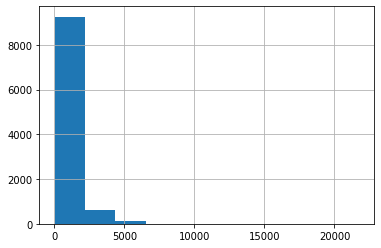

In [9]:
reviews['review/text'].str.len().hist()

**We now will convert text to lower case and split the reviews into word counts.**

In [10]:
reviews['review/text'] = reviews['review/text'].astype(str).str.lower()
reviews['text_tokens'] = reviews['review/text'].apply(nltk.word_tokenize)
reviews.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,text_tokens
0,B0006AQ616,Walt Whitman,NaN,A244RGQNVMCDIK,Simon of the Pulpitzer Awards,3/3,5.0,1216857600,Great Reproduction,"i've been doing some research on whitman, and ...","[i, 've, been, doing, some, research, on, whit..."
1,B000GSDG8E,"Rich Dad, Poor Dad",NaN,A2OS1H34LALKGD,"mobius ""mobiuspowershred""",4/10,2.0,962409600,Where's the BEEEFFFF?,kinda like all the hype with the new star wars...,"[kinda, like, all, the, hype, with, the, new, ..."
2,B000QKT4LA,Path of the Jaguar,NaN,A3PM6M7X1GH200,accisse,2/2,3.0,1342396800,Mystery and romance,a tidy little light mystery. it is not a thril...,"[a, tidy, little, light, mystery, ., it, is, n..."
3,B000HEGHT2,Speaker for the Dead,NaN,ALD7XTUFKNL7D,T. Peck,0/0,5.0,1344297600,"A great vacation read, Orson Scott Card Speake...","the second book in the series, the characters ...","[the, second, book, in, the, series, ,, the, c..."
4,0873384458,Showplace of America: Cleveland's Euclid Avenu...,47.0,A2TLFM93VB73B4,Blake7134,2/2,5.0,1314835200,Great Book!,i've been interested in cleveland history for ...,"[i, 've, been, interested, in, cleveland, hist..."
